In [2]:
import os
import sys
work_dir = '/home/abhijit/nat/Object-Detection'
data_dir = work_dir+'/data/'
util_dir = work_dir+'/data_utilities/'
os.chdir(work_dir)
sys.path.append(util_dir)
sys.path.append(data_dir)

import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline
from PIL import Image, ImageDraw 
from tqdm import tqdm
import pickle
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from matplotlib.lines import Line2D
import pandas as pd
from read_write import *
import shutil
from torch.utils.data import random_split
import torch.nn as nn

In [3]:
#Loading our labels
coords, chips, classes = wv.get_labels(data_dir+'xView_train.geojson')

100%|██████████| 601937/601937 [00:03<00:00, 163087.82it/s]


In [4]:
labels = {}
with open(util_dir+'xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

valid_labels = list(labels.keys())

In [5]:
valid_chip_names = load("valid_chip_names.pkl")

id2label = load("class_to_label_map.pkl")

label2id = {v:k for k,v in id2label.items()}

len(id2label)

60

In [5]:
label2id

{'Fixed-wing Aircraft': '11',
 'Small Aircraft': '12',
 'Cargo Plane': '13',
 'Helicopter': '15',
 'Passenger Vehicle': '17',
 'Small Car': '18',
 'Bus': '19',
 'Pickup Truck': '20',
 'Utility Truck': '21',
 'Truck': '23',
 'Cargo Truck': '24',
 'Truck w/Box': '25',
 'Truck Tractor': '26',
 'Trailer': '27',
 'Truck w/Flatbed': '28',
 'Truck w/Liquid': '29',
 'Crane Truck': '32',
 'Railway Vehicle': '33',
 'Passenger Car': '34',
 'Cargo Car': '35',
 'Flat Car': '36',
 'Tank car': '37',
 'Locomotive': '38',
 'Maritime Vessel': '40',
 'Motorboat': '41',
 'Sailboat': '42',
 'Tugboat': '44',
 'Barge': '45',
 'Fishing Vessel': '47',
 'Ferry': '49',
 'Yacht': '50',
 'Container Ship': '51',
 'Oil Tanker': '52',
 'Engineering Vehicle': '53',
 'Tower crane': '54',
 'Container Crane': '55',
 'Reach Stacker': '56',
 'Straddle Carrier': '57',
 'Mobile Crane': '59',
 'Dump Truck': '60',
 'Haul Truck': '61',
 'Scraper/Tractor': '62',
 'Front loader/Bulldozer': '63',
 'Excavator': '64',
 'Cement Mixer

In [ ]:
def label2idx(labels):
    return {label:label2id[label] for label in labels}

In [ ]:
label2idx(['Cargo Truck','Truck w/Box', 'Truck w/Flatbed'])

In [ ]:
unique, counts = np.unique(classes, return_counts=True)
class_counts = {k:0 for k in list(unique.astype('int64'))}

In [ ]:
transform=transforms.Compose([
            transforms.Resize((32,32)),
            transforms.ToTensor()])

dataset = ImageFolder(data_dir+'new_t',transform=transform,)

#trainset, valset = random_split(dataset, [189829, 81355])

trainloader = torch.utils.data.DataLoader(dataset, batch_size=25, shuffle=True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images)

idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

In [ ]:
np.unique(dataset.targets,return_counts=True)

In [ ]:
len(dataset.targets)

In [ ]:
labels1 = [id2label[idx_to_class[i]] for i in range(len(dataset.classes))]

In [ ]:
labels1

In [ ]:
dataset.classes

In [ ]:
def show(img):
    npimg = img.numpy()
    plt.figure(figsize=[15,10])
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
show(img_grid)

In [ ]:
train_size = 0.7*len(dataset)
val_size = 0.3*len(dataset)
print("full size",len(dataset))
print("train size",train_size)
print("val size",val_size)
189829+81355

In [ ]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        
def plot_classes_preds(images, labels):
    
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(10, 10))
    for idx in np.arange(len(images)):
        ax = fig.add_subplot(5, 5, idx+1, xticks=[], yticks=[])
        ax.set_title(id2label[idx_to_class[labels[idx].item()]])
        matplotlib_imshow(images[idx])
    return fig
#writer = SummaryWriter('runs/Object_detection_experiment_'+str(np.random.randint(0,1000)),flush_secs=1)
#writer.add_figure('Images and labels', plot_classes_preds(images, labels))

In [ ]:
plot_classes_preds(images, labels)

In [ ]:
id2label

In [126]:
total_num_of_images = 0
class_counts = {}
for subdir, dirs, files in os.walk(data_dir+'train_images_22classes'):
    if len(files)>0:
        print(f'{id2label.get(subdir[-2:],-1):>25} {len(files):>10}')
        class_counts[id2label.get(subdir[-2:],-1)] = len(files)
        total_num_of_images+=len(files)
print(total_num_of_images)

                       -1        729
                       -1      16782
      Fixed-wing Aircraft        910
             Pickup Truck       3185
                       -1       1809
                       -1      10330
               Helicopter        836
                       -1        856
                       -1        938
                       -1       6892
                      Bus       1026
                Small Car       1145
                       -1       1820
           Small Aircraft        606
        Passenger Vehicle        703
            Utility Truck       1609
              Cargo Plane       1351
                       -1        705
                       -1       1455
                       -1     213429
                       -1       1596
                       -1       4057
272769


In [ ]:
total_num_of_images

In [ ]:
clas

In [ ]:
import copy
a = copy.deepcopy(class_counts)

In [ ]:
c_count = pd.DataFrame(list(class_counts.values()))
c_count[c_count[0]>700].values[1:]
small_subset_class = {}
a = 0
for label, count in class_counts.items():
    
    if count > 700 and count < 250000:
        small_subset_class[label] = count
        #print(label,count)
        a+=count
print("total",a)
print(small_subset_class)
print("total confirm",sum(list(small_subset_class.values())))
print("len",len(small_subset_class))
#save('class_counts_24classes.pkl',small_subset_class)

In [ ]:
new_classes = load('class_counts_24classes.pkl')
#os.mkdir(data_dir+'train_images_24classes')
# for i in list(new_classes.keys()):
#     os.mkdir(data_dir+'train_images_24classes/'+str(int(label2id[i])))

TypeError: 'value' must be an instance of str or bytes, not a int

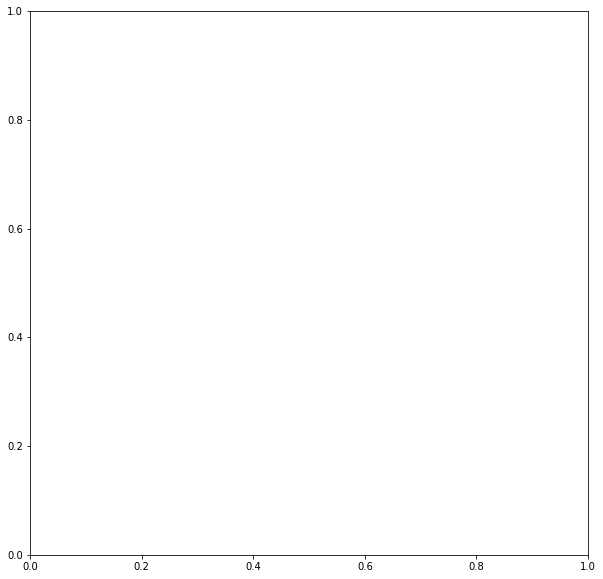

In [127]:
fig, ax = plt.subplots(figsize=[10,10])
class_counts = sorted(class_counts.items(), key=lambda class_counts: class_counts[1])
class_counts = {k: v for k, v in class_counts}
real_count = list(class_counts.values())
total_count = np.sum(real_count)
bars = plt.barh(list(class_counts.keys()), np.log(np.array(list(class_counts.values()))), edgecolor='k',color='skyblue')

for i,bar in enumerate(bars): 
    width = bar.get_width() +0.1
    label_y_pos = bar.get_y() + 0.2 + bar.get_height() // 2
    #ax.text(width,label_y_pos, s=f'{real_count[i]}',fontweight='bold',fontdict={'fontsize':14})
    ax.text(width,label_y_pos, s=f'{np.round(1.0*real_count[i]/total_count,4)*100.0:.2f} %, {real_count[i]}',fontweight='bold',fontdict={'fontsize':14})
    
    if i > 44:
        bar.set_color('#8f9805')
        bar.set_edgecolor('k')

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(14)
    tick.label1.set_fontweight('bold')

custom_lines = [Line2D([0], [0], color='#8f9805', lw=4)]
#plt.legend(custom_lines,['Top 15 most frequent classes'],loc=5,fontsize='large')
plt.title('Class Distribution (number of classes = ' + str(len(real_count))+')',fontdict={'fontsize':15,'fontweight':'bold'})
plt.xlabel('Frequency (log scale)', fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('Class', fontdict={'fontsize':15,'fontweight':'bold'})
plt.xlim(0,14)

plt.show()

In [ ]:
plt.savefig('test_saving1.png')

In [ ]:
fig.savefig('test_saving2.png', bbox_inches='tight')

In [ ]:
save_plot_directory = os.path.join('./runs', os.sep, 'resnet50',os.sep,'blah')

In [ ]:
save_plot_directory

In [ ]:
f = open('old_pixel_areas.pkl','rb')
old_pixel_areas = pickle.load(f)
plt.figure(figsize=[10,6])
plt.hist(np.log(np.array(old_pixel_areas)),bins=50,color='skyblue',ec="k")

plt.title('Histogram of pixel areas before resampling \n Total number of images = 593,091',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel('Frequency (log scale)', fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('Class', fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlim(5,14)

plt.show()

In [ ]:
f = open('new_pixel_areas.pkl','rb')
new_pixel_areas = pickle.load(f)
plt.figure(figsize=[10,6])
plt.hist(np.log(np.array(new_pixel_areas)),bins=20,color='skyblue',ec="k")

plt.title('Histogram of pixel areas after resampling \n Total number of images = 581,470',fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlabel('Frequency (log scale)', fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('Class', fontdict={'fontsize':14,'fontweight':'bold'})
plt.xlim(5,14)

plt.show()

In [ ]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(data_dir+'train_images_24classes/', output=data_dir+'train_images_24classess_split', seed=1337, ratio=(.7, .3), group_prefix=None) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#splitfolders.fixed("input_folder", output="output", seed=1337, fixed=(100, 100), oversample=False, group_prefix=None) # default values

In [ ]:
!pwd

In [ ]:
!pip install split-folders

In [ ]:
data_dir+'train_images_24classess_split'

In [ ]:
splitfolders.ratio()

In [ ]:
import torch.nn as nn

net = nn.Sequential(nn.Linear(20, 6), nn.Linear(6, 3))

In [ ]:
net[0]

In [ ]:
from models.resnet import resnet18

In [ ]:
net = resnet18(5)

In [ ]:
net

In [ ]:
net

In [ ]:
for name, param in net.named_parameters():
    if param.requires_grad:
        print(name)

In [ ]:
for name,param in net.named_parameters():
    print(name)

In [ ]:
list(net.children())[-1].named

In [ ]:
net.train()

In [ ]:
input_tensor = torch.Tensor(10, 3, 64, 64)

In [ ]:
net = net.cuda()
output = net(input_tensor)

In [ ]:
a, b = output.max(1)

In [ ]:
b.tolist()

In [ ]:
f = []

In [ ]:
f.extend(b.tolist())

In [ ]:
f

In [ ]:
images, labels = next(iter(trainloader))

In [ ]:
images.shape

In [ ]:
labels

In [ ]:
labels.tolist()

In [ ]:
!nvidia-msi

In [118]:
def get_mean_std(loader):
    channels_sum, channels_squared_sum, num_batches = 0.0, 0.0, 0
    
    for data, _ in loader:
        channels_sum += torch.mean(data, dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1
        
    mean = channels_sum/num_batches
    std = (channels_squared_sum/num_batches - mean**2)**0.5
    
    return mean, std

In [119]:
transform=transforms.Compose([
            transforms.Resize((32,32)),
            transforms.ToTensor()])

dataset = ImageFolder(data_dir+'train_images_22classes_split/train',transform=transform,)

#trainset, valset = random_split(dataset, [189829, 81355])

trainloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=False)

In [120]:
get_mean_std(trainloader)

(tensor([0.2532, 0.2125, 0.1867]), tensor([0.1537, 0.1390, 0.1325]))

In [ ]:
trainloader_new = torch.utils.data.DataLoader(dataset, batch_size=len(dataset))

In [121]:
a = next(iter(trainloader))

In [122]:
img, labels = a

In [123]:
img.mean([0,2,3])

tensor([0.2532, 0.2125, 0.1867])

In [124]:
img.std([0,2,3])

tensor([0.1537, 0.1390, 0.1325])

In [ ]:
x = torch.Tensor(5,3,4,4)

In [ ]:
torch.mean(x,[0,2,3])

In [ ]:
torch.mean(x[:,2,:,:])

In [ ]:
len(dataset)

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
resnet50 = torchvision.models.resnet50(pretrained=True)

In [ ]:
print(f'{"model":<35} {"requires grad":<10}')
for name, param in resnet50.named_parameters():
    print(f'{name:<35} {str(param.requires_grad):<10}')

In [ ]:
for param in resnet50.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = resnet50.fc.in_features
resnet50.fc = nn.Linear(num_ftrs, 2)

In [ ]:
print(f'{"model":<35} {"requires grad":<10}')
for name, param in resnet50.named_parameters():
      layer, attr = os.path.splitext(name)
    print(f'{name:<35} {str(param.requires_grad):<10}')

In [ ]:
resnet50.conv1

In [ ]:
for name, param in net.named_parameters():
    layer, attr = os.path.splitext(name)
    print("layer",layer, "attr", attr)

In [ ]:
input_tensor = torch.Tensor(1, 3, 32, 32)

In [ ]:
from utils import *

In [ ]:
net = Net()

In [ ]:
y = net(input_tensor)

In [ ]:
y

In [ ]:
net

In [ ]:
input_tensor

In [ ]:
import pandas as pd
test_loss50 = pd.read_csv('run-resnet50_Saturday_13_March_2021_04h_22m_07s-tag-Test_Average loss.csv')
test_acc50 = pd.read_csv('run-resnet50_Saturday_13_March_2021_04h_22m_07s-tag-Test_Accuracy.csv')
test_loss18 = pd.read_csv('run-resnet18_Saturday_13_March_2021_15h_23m_49s-tag-Test_Average loss.csv')
test_acc18 =pd.read_csv('run-resnet18_Saturday_13_March_2021_15h_23m_49s-tag-Test_Accuracy.csv')

In [ ]:
test_loss50_x = test_loss50.Step.values
test_loss50_y = test_loss50.Value.values

test_loss18_x = test_loss18.Step.values
test_loss18_y = test_loss18.Value.values

test_acc50_x = test_acc50.Step.values
test_acc50_y = test_acc50.Value.values

test_acc18_x = test_acc18.Step.values
test_acc18_y = test_acc18.Value.values

In [ ]:
plt.plot(test_loss50_x,test_loss50_y , 'b', label='ResNet50')
plt.plot(test_loss18_x[:49],test_loss18_y[:49] , 'r', label='ResNet18')
plt.title('Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(test_acc50_x, test_acc50_y , 'b', label='ResNet50')
plt.plot(test_acc18_x[:49],test_acc18_y[:49] , 'r', label='ResNet18')
plt.title('Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_acc18

In [ ]:
test_acc50

In [ ]:
import os 
os.chdir('./imbalanced-dataset-sampler')
!python setup.py install
!pip install .

In [141]:
transform=transforms.Compose([
            transforms.Resize((32,32)),
            transforms.ToTensor()])

dataset = ImageFolder(data_dir+'train_images_22classes_split/train',transform=transform,)

trainloader = torch.utils.data.DataLoader(dataset, batch_size=25, shuffle=True)

In [142]:
x = np.unique(dataset.targets, return_counts=True)[1]

In [146]:
max(x)/x

array([0.0043909 , 0.00681392, 0.00426372, 0.00283802, 0.0063253 ,
       0.00329987, 0.00391566, 0.00341365, 0.00329317, 0.00536145,
       0.00480589, 1.        , 0.01491968, 0.00753681, 0.0084739 ,
       0.07862784, 0.04839357, 0.00400937, 0.01900268, 0.03228916,
       0.00747657, 0.00852744])

In [ ]:
x

In [ ]:
one_batch = next(iter(trainloader))

In [ ]:
unique, counts = np.unique(one_batch[1].numpy(), return_counts=True)

In [ ]:
from data_utilities.read_write import *
index_to_class = {index: classs for classs, index in dataset.class_to_idx.items()} 

class_to_label = load("class_to_label_map.pkl")

class_names = [class_to_label[index_to_class[i]] for i in unique]

In [ ]:
class_names

In [ ]:
counts

In [ ]:
total_num_of_images = 0
class_counts = {}
for subdir, dirs, files in os.walk(data_dir+'train_images_24classes_split/train'):
    if len(files)>0:
        print(f'{id2label.get(subdir[-2:],-1):>25} {len(files):>10}')
        class_counts[id2label.get(subdir[-2:],-1)] = len(files)
        total_num_of_images+=len(files)
print(total_num_of_images)

In [ ]:
from torchsampler import ImbalancedDatasetSampler

balanced_train_loader = torch.utils.data.DataLoader(
    dataset, 
    sampler=ImbalancedDatasetSampler(dataset),
    batch_size=25)

In [ ]:
balanced_one_batch = next(iter(balanced_train_loader))

In [ ]:
balanced_unique, balanced_counts = np.unique(balanced_one_batch[1].numpy(), return_counts=True)

In [ ]:
class_names = [class_to_label[index_to_class[i]] for i in balanced_unique]

In [ ]:
balanced_counts

In [ ]:
class_names

In [ ]:
len(class_names)

In [ ]:
for i in range(1,23):
    os.mkdir('./data/train_images_22classes/'+str(i))

In [ ]:
!ls -lh data/train_images_22classes/1

In [125]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(data_dir+'train_images_22classes/', output=data_dir+'train_images_22classes_split', seed=1337, ratio=(.7, .3), group_prefix=None) # default values

Copying files: 272769 files [30:44, 147.85 files/s] 


In [133]:
from utils import load_object, save_object
class_to_label = load_object("class_to_label_map.pkl")

In [130]:
class_to_label

{'11': 'Fixed-wing Aircraft',
 '12': 'Small Aircraft',
 '13': 'Cargo Plane',
 '15': 'Helicopter',
 '17': 'Passenger Vehicle',
 '18': 'Small Car',
 '19': 'Bus',
 '20': 'Pickup Truck',
 '21': 'Utility Truck',
 '23': 'Truck',
 '24': 'Cargo Truck',
 '25': 'Truck w/Box',
 '26': 'Truck Tractor',
 '27': 'Trailer',
 '28': 'Truck w/Flatbed',
 '29': 'Truck w/Liquid',
 '32': 'Crane Truck',
 '33': 'Railway Vehicle',
 '34': 'Passenger Car',
 '35': 'Cargo Car',
 '36': 'Flat Car',
 '37': 'Tank car',
 '38': 'Locomotive',
 '40': 'Maritime Vessel',
 '41': 'Motorboat',
 '42': 'Sailboat',
 '44': 'Tugboat',
 '45': 'Barge',
 '47': 'Fishing Vessel',
 '49': 'Ferry',
 '50': 'Yacht',
 '51': 'Container Ship',
 '52': 'Oil Tanker',
 '53': 'Engineering Vehicle',
 '54': 'Tower crane',
 '55': 'Container Crane',
 '56': 'Reach Stacker',
 '57': 'Straddle Carrier',
 '59': 'Mobile Crane',
 '60': 'Dump Truck',
 '61': 'Haul Truck',
 '62': 'Scraper/Tractor',
 '63': 'Front loader/Bulldozer',
 '64': 'Excavator',
 '65': 'Cement

In [131]:
class_to_label_22classes = {
    
    '1':'Plane',
    '2':'Small Car',
    '3':'PickupUtilityTruck',
    '4':'CargoBoxFlatbedTrucks',
    '5':'Truck Tractor',
    '6':'Trailer',
    '7':'Bus',
    '8':'Passenger Car',
    '9':'Cargo/Container Car',
    '10':'Motorboat',
    '11':'SailTugBoats',
    '12':'FerryYacht',
    '13':'Dump Truck',
    '14':'TractorBulldozer',
    '15':'Excavator',
    '16':'Fishing Vessel',
    '17':'Hut/Tent',
    '18':'Shed',
    '19':'Damaged Building',
    '20':'Vehicle Lot',
    '21':'Storage Tank',
    '22':'Shipping container lot'
}

In [132]:
class_to_label_22classes

{'1': 'Plane',
 '2': 'Small Car',
 '3': 'Pickup Utility Truck',
 '4': 'CargoBoxFlatbedTrucks',
 '5': 'Truck Tractor',
 '6': 'Trailer',
 '7': 'Bus',
 '8': 'Passenger Car',
 '9': 'Cargo/Container Car',
 '10': 'Motorboat',
 '11': 'SailTugBoats',
 '12': 'FerryYacht',
 '13': 'Dump Truck',
 '14': 'TractorBulldozer',
 '15': 'Excavator',
 '16': 'Fishing Vessel',
 '17': 'Hut/Tent',
 '18': 'Shed',
 '19': 'Damaged Building',
 '20': 'Vehicle Lot',
 '21': 'Storage Tank',
 '22': 'Shipping container lot'}

In [136]:
save_object('class_to_label_22classes.pkl', class_to_label_22classes)

In [137]:
a = load_object('class_to_label_22classes.pkl')

In [138]:
a

{'1': 'Plane',
 '2': 'Small Car',
 '3': 'Pickup Utility Truck',
 '4': 'CargoBoxFlatbedTrucks',
 '5': 'Truck Tractor',
 '6': 'Trailer',
 '7': 'Bus',
 '8': 'Passenger Car',
 '9': 'Cargo/Container Car',
 '10': 'Motorboat',
 '11': 'SailTugBoats',
 '12': 'FerryYacht',
 '13': 'Dump Truck',
 '14': 'TractorBulldozer',
 '15': 'Excavator',
 '16': 'Fishing Vessel',
 '17': 'Hut/Tent',
 '18': 'Shed',
 '19': 'Damaged Building',
 '20': 'Vehicle Lot',
 '21': 'Storage Tank',
 '22': 'Shipping container lot'}

In [139]:
pwd

'/home/abhijit/nat/Object-Detection'

In [140]:
ls

 README.md*
 __pycache__/
 checkpoint/
 config.py*
 data/
 data_loader/
 data_utilities/
 imbalanced-dataset-sampler/
 lr_finder.py*
 models/
'models\resnet'/
 obj-detection/
 requirements.txt*
 result.jpg*
 run-resnet18_Saturday_13_March_2021_15h_23m_49s-tag-Test_Accuracy.csv*
'run-resnet18_Saturday_13_March_2021_15h_23m_49s-tag-Test_Average loss.csv'*
 run-resnet50_Saturday_13_March_2021_04h_22m_07s-tag-Test_Accuracy.csv*
'run-resnet50_Saturday_13_March_2021_04h_22m_07s-tag-Test_Average loss.csv'*
 run-resnet50_Saturday_13_March_2021_04h_22m_07s-tag-Train_loss.csv*
 runs/
 train.py*
 utils.py*
 workspace.code-workspace*
 xView_Processing.ipynb*


In [6]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
t = print(classification_report(y_true, y_pred, target_names=target_names))

/home/abhijit/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [8]:
t

In [ ]:
sys.stdout = open("test.txt", "w")

print("Hello World")

sys.stdout.close()

In [8]:
with open('out.txt', 'w') as f:
    
    print(classification_report(y_true, y_pred, target_names=target_names),file=f)